![](img/banner.png)
%%HTML
<script src="require.js"></script>

# k-means in high dimensional spaces

**Mahmood Amintoosi, Fall 2024**

Computer Science Dept, Ferdowsi University of Mashhad

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification  
from sklearn.cluster import KMeans  
from sklearn.metrics import adjusted_rand_score  

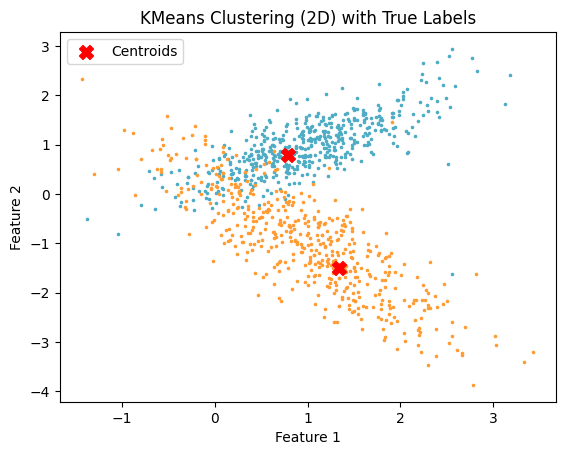

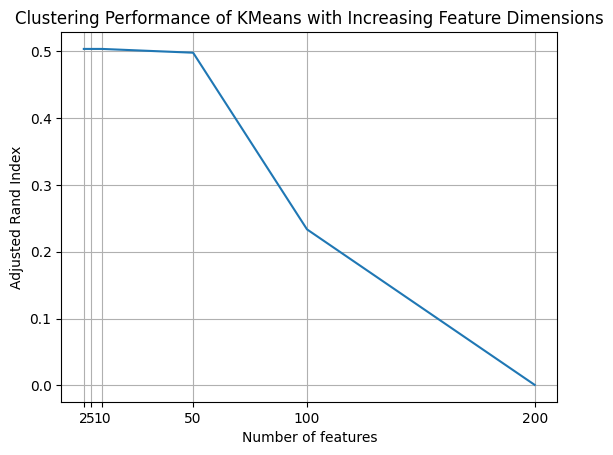

In [2]:
n_samples = 1000  
n_classes = 2  

# Define an empty list to store the scores  
scores = []  
n_dimensions = [2, 5, 10, 50, 100, 200]  # List of dimensions to evaluate  

for d in n_dimensions:  
    # Generate synthetic Gaussian data  
    X, y = make_classification(  
        n_samples=n_samples,  
        n_features=d,  
        n_classes=n_classes,  
        n_redundant=0,  
        n_informative=2,  
        random_state=1,  
        n_clusters_per_class=1,  
    )  

    # Fit KMeans  
    kmeans = KMeans(n_clusters=n_classes, random_state=42)  
    kmeans.fit(X)  

    # Predict the cluster labels  
    y_pred = kmeans.labels_  

    # Compute the clustering score using Adjusted Rand Index  
    score = adjusted_rand_score(y, y_pred)  
    scores.append(score)  

    if d == 2:  
        # Plot initial seeds alongside sample data for the 2D case  
        plt.figure(1)  
        colors = ["#4EACC5", "#FF9C34"]  

        for k in range(n_classes):  
            cluster_data = y == k  
            plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=colors[k], marker=".", s=10)  
        
        # Plot cluster centroids  
        centroids = kmeans.cluster_centers_  
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')  
        plt.legend()  
        plt.title("KMeans Clustering (2D) with True Labels")  
        plt.xlabel("Feature 1")  
        plt.ylabel("Feature 2")  
        plt.show()  

# Plot the clustering scores versus the number of features  
plt.plot(n_dimensions, scores)  
plt.xlabel("Number of features")  
plt.ylabel("Adjusted Rand Index")  
plt.title("Clustering Performance of KMeans with Increasing Feature Dimensions")  
plt.xticks(n_dimensions)  
plt.grid()  
plt.show()